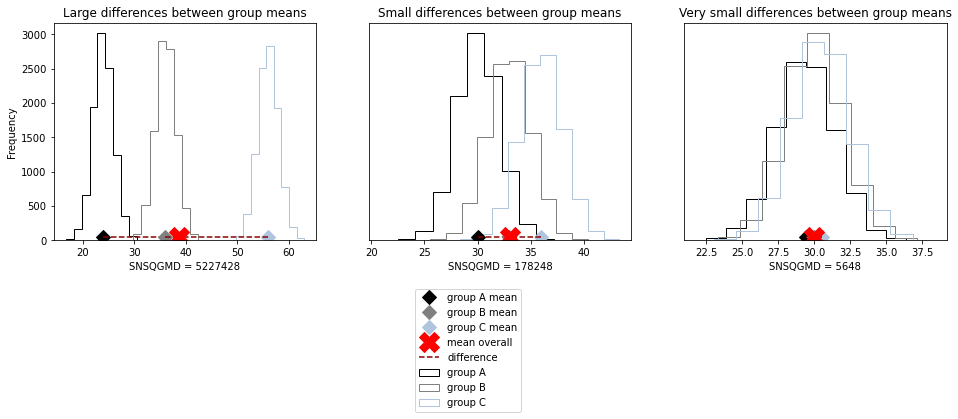

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# SNSQGMD simulation, showing how SNSQGMD varies as a function of the distance between the group means and the overall mean

# a function to compute SNSQGMD
def SNSQGMD(a,b,c):
    
    n_a = len(a)
    n_b = len(b)
    n_c = len(c)
    
    mean_a = a.mean()
    mean_b = b.mean()
    mean_c = c.mean()
     
    all_together = np.concatenate((a,b,c))
    overall_mean = all_together.mean()
    
    SNSQGMD = np.sum([(mean_a - overall_mean)**2*n_a, (mean_b - overall_mean)**2*n_b, (mean_c - overall_mean)**2*n_c])
    
    return SNSQGMD.astype('int')

# plotting three scenarios (large difference between group means, small difference between group means and very small difference)
size = 10000
group_a = np.random.normal(24, 2, size)
group_b = np.random.normal(36, 2, size)
group_c = np.random.normal(56, 2, size)
all_groups = np.concatenate((group_a, group_b, group_c))
groups =[group_a, group_b, group_c]

# a colour palette
colours = ['black', 'grey', 'lightsteelblue']

# list of group names
abc = ['A', 'B', 'C']

# the height of the mean markers
marker_height = 50

# first subplot, large difference between the group means
plt.figure(figsize = (16, 4))
plt.subplot(1,3,1)

for i in np.arange(3):
    plt.hist(groups[i], color = colours[i], histtype = 'step', 
             label = 'group '+str(abc[i]))
    plt.plot(groups[i].mean(), marker_height ,  'D', color = colours[i], markersize = 10, label = 'group '+str(abc[i])+' mean')
    plt.plot([groups[i].mean(), all_groups.mean()], [marker_height , marker_height ], '--', color = 'darkred')
plt.plot(all_groups.mean(), marker_height , 'X', color = 'red', markersize = 20, label = 'mean overall')
plt.plot([ ], [], '--', color = 'darkred', label = 'difference')
plt.xlabel('SNSQGMD = '+str(SNSQGMD(group_a, group_b, group_c)))
plt.ylabel('Frequency')
plt.title('Large differences between group means')
plt.legend(bbox_to_anchor = (1.8, -0.2))

# second subplot, small difference between the group means
group_a_small = np.random.normal(30, 2, size)
group_b_small = np.random.normal(33, 2, size)
group_c_small = np.random.normal(36, 2, size)
all_groups_small = np.concatenate((group_a_small, group_b_small, group_c_small))
groups = [group_a_small, group_b_small, group_c_small]

plt.subplot(1,3,2)
for i in np.arange(3):
    plt.hist(groups[i], color = colours[i], histtype = 'step')
    plt.plot(groups[i].mean(), marker_height ,  'D', color = colours[i], markersize = 10)
    plt.plot([groups[i].mean(), all_groups_small.mean()], [marker_height , marker_height ], '--', color = 'darkred')
plt.plot(all_groups_small.mean(), marker_height , 'X', color = 'red', markersize = 20)
plt.xlabel('SNSQGMD = '+str(SNSQGMD(group_a_small, group_b_small, group_c_small)))
plt.title('Small differences between group means')
plt.yticks([])

# third subplot, very small difference between the group means
group_a_null = np.random.normal(29.5, 2, size)
group_b_null = np.random.normal(30, 2, size)
group_c_null = np.random.normal(30.5, 2, size)
all_groups_null = np.concatenate((group_a_null, group_b_null, group_c_null))
groups = [group_a_null, group_b_null, group_c_null]

plt.subplot(1,3,3)
for i in np.arange(3):
    plt.hist(groups[i], color = colours[i], histtype = 'step')
    plt.plot(groups[i].mean(), marker_height ,  'D', color = colours[i], markersize = 10)
    plt.plot([groups[i].mean(), all_groups_null.mean()], [marker_height , marker_height ], '--', color = 'darkred')
plt.plot(all_groups_null.mean(), marker_height , 'X', color = 'red', markersize = 20)
plt.xlabel('SNSQGMD = '+str(SNSQGMD(group_a_null, group_b_null, group_c_null)))
plt.title('Very small differences between group means')
plt.yticks([])
plt.show()

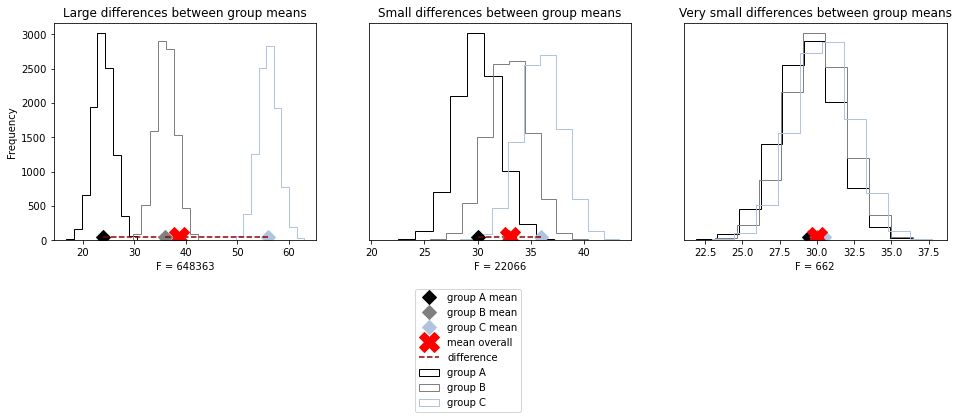

In [2]:
# F-statistic simulation, showing how the F-statistic changes, in a similar fashion to SNSQGMD, as a function of the distance between the group means 
# and the overall mean

# plotting three scenarios (large difference between group means, small difference between group means and very small 
# differences between the group means)

# first subplot, large differences between the group means
plt.figure(figsize = (16, 4))
plt.subplot(1,3,1)
groups = [group_a, group_b, group_c]
for i in np.arange(3):
    plt.hist(groups[i], color = colours[i], histtype = 'step', 
             label = 'group '+str(abc[i]))
    plt.plot(groups[i].mean(), marker_height ,  'D', color = colours[i], markersize = 10, label = 'group '+str(abc[i])+' mean')
    plt.plot([groups[i].mean(), all_groups.mean()], [marker_height , marker_height ], '--', color = 'darkred')
plt.plot(all_groups.mean(), marker_height , 'X', color = 'red', markersize = 20, label = 'mean overall')
plt.plot([ ], [], '--', color = 'darkred', label = 'difference')
plt.xlabel('F = '+str(f_oneway(group_a, group_b, group_c).statistic.astype('int')))
plt.ylabel('Frequency')
plt.title('Large differences between group means')
plt.legend(bbox_to_anchor = (1.8, -0.2))

# second subplot, small differences between the group means

groups = [group_a_small, group_b_small, group_c_small]

plt.subplot(1,3,2)
for i in np.arange(3):
    plt.hist(groups[i], color = colours[i], histtype = 'step')
    plt.plot(groups[i].mean(), marker_height ,  'D', color = colours[i], markersize = 10)
    plt.plot([groups[i].mean(), all_groups_small.mean()], [marker_height , marker_height ], '--', color = 'darkred')
plt.plot(all_groups_small.mean(), marker_height , 'X', color = 'red', markersize = 20)
plt.xlabel('F = '+str(f_oneway(group_a_small, group_b_small, group_c_small).statistic.astype('int')))
plt.title('Small differences between group means')
plt.yticks([])

# third subplot, very small differences between the group means
group_a_null = np.random.normal(29.5, 2, size)
group_b_null = np.random.normal(30, 2, size)
group_c_null = np.random.normal(30.5, 2, size)
all_groups_null = np.concatenate((group_a_null, group_b_null, group_c_null))
groups = [group_a_null, group_b_null, group_c_null]

plt.subplot(1,3,3)
for i in np.arange(3):
    plt.hist(groups[i], color = colours[i], histtype = 'step')
    plt.plot(groups[i].mean(), marker_height ,  'D', color = colours[i], markersize = 10)
    plt.plot([groups[i].mean(), all_groups_null.mean()], [marker_height , marker_height ], '--', color = 'darkred')
plt.plot(all_groups_null.mean(), marker_height , 'X', color = 'red', markersize = 20)
plt.xlabel('F = '+str(f_oneway(group_a_null, group_b_null, group_c_null).statistic.astype('int')))
plt.title('Very small differences between group means')
plt.yticks([])
plt.show()